***Tutorial***

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.2241 - val_loss: 0.1132
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1119 - val_loss: 0.1052
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1056 - val_loss: 0.1037
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1028 - val_loss: 0.1001
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1008 - val_loss: 0.0986
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0992 - val_loss: 0.0976
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0980 - val_loss: 0.0965
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0966 - val_loss: 0.0956
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0961 - val_loss: 0.0950
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


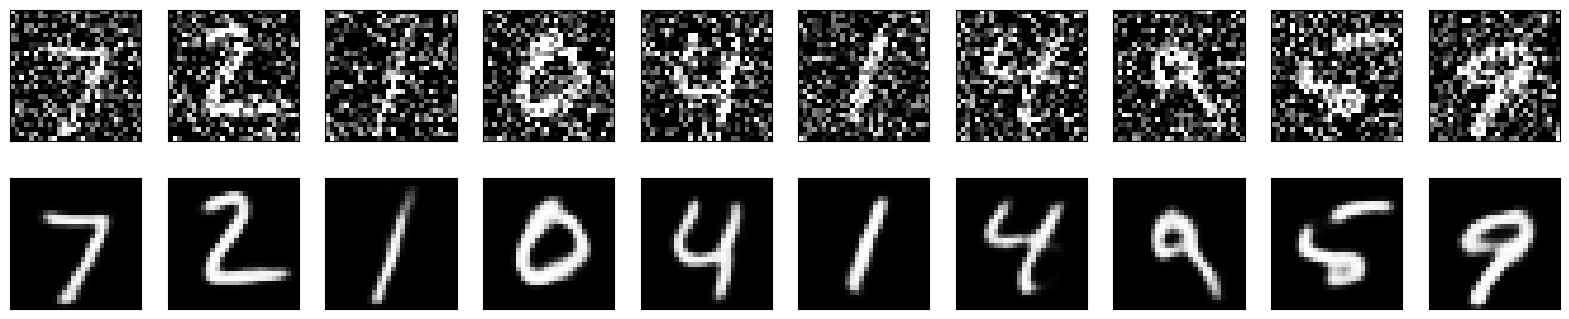

In [2]:
# import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# normalize images to be between 0 & 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype( 'float32') / 255.
#Reshape the data to include the channel dimension (for grayscale images, channel 1)
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

#Function to add random noise
def add_noise(images, noise_factor = 0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.) # Keep values between 0 and 1
    return noisy_images
#Add noise to training and test images
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

#Define the encoder
input_img = layers.Input (shape =(28,28,1))
#Convolutional layers for encoding
x= layers.Conv2D(32, (3, 3), activation ='relu' , padding = 'same' )(input_img)
x= layers.MaxPooling2D((2, 2), padding = 'same' )(x)
x= layers.Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
#Define the decoder
x= layers.Conv2D(64, (3, 3), activation='relu' , padding='same') (encoded)
x= layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation ="relu", padding = 'same' )(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same' )(x)
#Define the model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer= 'adam', loss= 'binary_crossentropy' )

#Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs =10,
                batch_size=128,
                shuffle= True,
                validation_data=(x_test_noisy, x_test))

# reconstruct noisy images
decoded_imgs = autoencoder.predict(x_test_noisy)

# plot some of the noisy and reconstructed images
n = 10 # num of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
#Display noisy Images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

# Display reconstructed images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap = 'gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

***Task 1+2***

---
Implementing deep autoencoder & variational autoencoder on MNIST dataset then comparing results using MSE of both. The results showed that DAE outperformed VAE as the final results are
MSE of Deep Autoencoder: 0.01070
MSE of Variational Autoencoder: 0.07581

Building models
Training DAE
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.2406
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.1127
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1060
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1029
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1006
Training VAE
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 456.8145
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 441.8199
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 441.7350
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 441.6704
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 441.7351
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

Results:
MSE of Deep autoencoder: 0.0120 | PSNR: 19.52 | SSIM: 0.8444
MSE of Variational autoencoder: 0.0926 | PSNR: 10.36 | SSIM: 0.0716


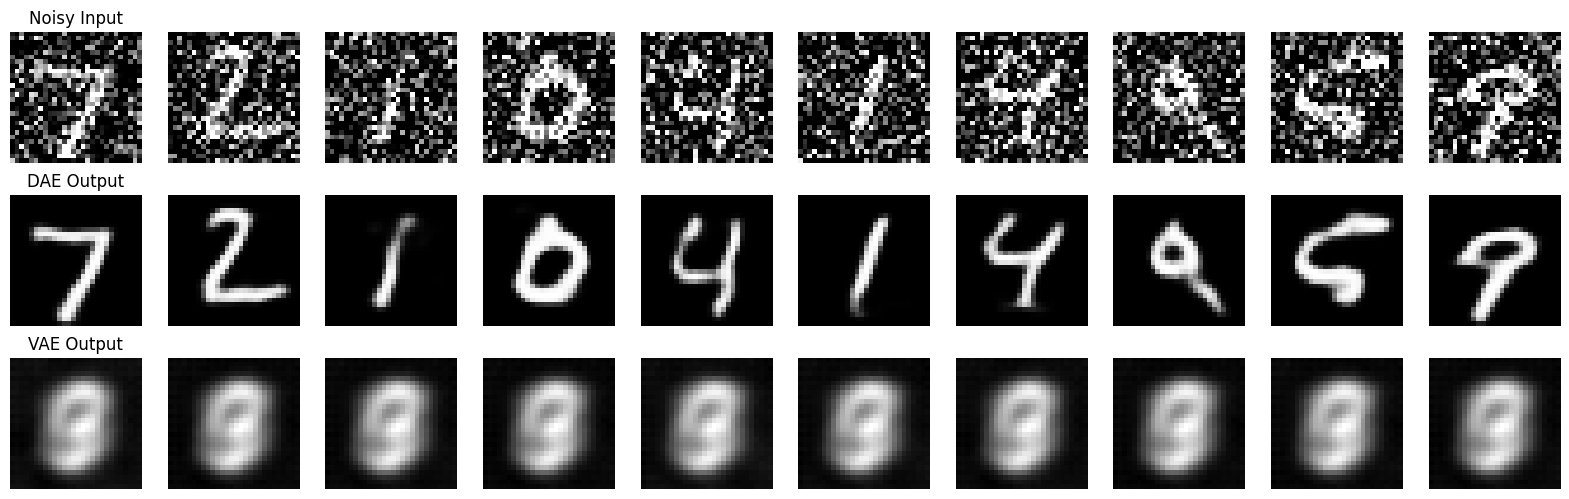

In [11]:
'''Training with 5 epocs'''
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Prepare Data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Add Noise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build Deep Denoising Autoencoder
def build_dae():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(input_img, decoded)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Build Variational Autoencoder

# Define a custom Layer for the VAE Loss to satisfy Keras 3 requirements
class VAELossLayer(layers.Layer):
    def call(self, inputs):
        x_true, x_pred, z_mean, z_log_var = inputs

        #  Reconstruction Loss (Binary Crossentropy)
        # We sum over the pixel dimensions (1, 2) to get one value per image
        reconstruction_loss = tf.reduce_sum(
            tf.keras.losses.binary_crossentropy(x_true, x_pred), axis=(1, 2)
        )
        reconstruction_loss = tf.reduce_mean(reconstruction_loss)

        # KL Divergence Loss
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

        # Add total loss to the layer
        self.add_loss(reconstruction_loss + kl_loss)

        # Return the reconstruction for metric tracking/visuals
        return x_pred

def build_vae():
    latent_dim = 2

    # Encoder
    encoder_inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)

    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling (using Lambda is usually fine, but wrapping in a custom layer is safer)
    def sampling(args):
        z_m, z_lv = args
        batch = tf.shape(z_m)[0]
        dim = tf.shape(z_m)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_m + tf.exp(0.5 * z_lv) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Create the Encoder Model
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

    # Create the Decoder Model
    decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")

    # VAE Model Assembly
    # Get encoder outputs
    z_mean_enc, z_log_var_enc, z_enc = encoder(encoder_inputs)

    # 2. Get decoder outputs
    reconstructed = decoder(z_enc)

    # 3. Calculate Loss using our Custom Layer
    # We pass [Inputs, Outputs, Mean, LogVar] to the layer
    outputs = VAELossLayer()([encoder_inputs, reconstructed, z_mean_enc, z_log_var_enc])

    # 4. Final Model
    vae = models.Model(encoder_inputs, outputs, name="vae")

    # Compile (loss is already added in the layer, so we use None or a dummy loss)
    vae.compile(optimizer='adam')

    return vae

# Train & Compare
print("Building models")
dae = build_dae()
vae = build_vae()

print("Training DAE")
dae.fit(x_train_noisy, x_train, epochs=5, batch_size=128, verbose=1)

print("Training VAE")
# VAE target data is not used for loss (handled internally), but Keras fit expects y=x
vae.fit(x_train_noisy, x_train, epochs=5, batch_size=128, verbose=1)

# Generate Predictions
dae_decoded = dae.predict(x_test_noisy)
vae_decoded = vae.predict(x_test_noisy)

#  Calculate Metrics
def calculate_metrics(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    # Using TF for SSIM/PSNR calculation
    psnr = tf.reduce_mean(tf.image.psnr(original, denoised, max_val=1.0)).numpy()
    ssim = tf.reduce_mean(tf.image.ssim(original, denoised, max_val=1.0)).numpy()
    return mse, psnr, ssim

d_mse, d_psnr, d_ssim = calculate_metrics(x_test, dae_decoded)
v_mse, v_psnr, v_ssim = calculate_metrics(x_test, vae_decoded)

print(f"\nResults:")
print(f"MSE of Deep autoencoder: {d_mse:.4f} | PSNR: {d_psnr:.2f} | SSIM: {d_ssim:.4f}")
print(f"MSE of Variational autoencoder: {v_mse:.4f} | PSNR: {v_psnr:.2f} | SSIM: {v_ssim:.4f}")

# Visual Comparison
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Noisy Input")

    # DAE Result
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(dae_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("DAE Output")

    # VAE Result
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(vae_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("VAE Output")
plt.show()

Training Deep autoencoder 
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.2355
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1113
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1050
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1023
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1001
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0987
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0977
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0970
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0964
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0958

Training Variational autoencoder
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 459.2813
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 438.1542
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 434.6788
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss

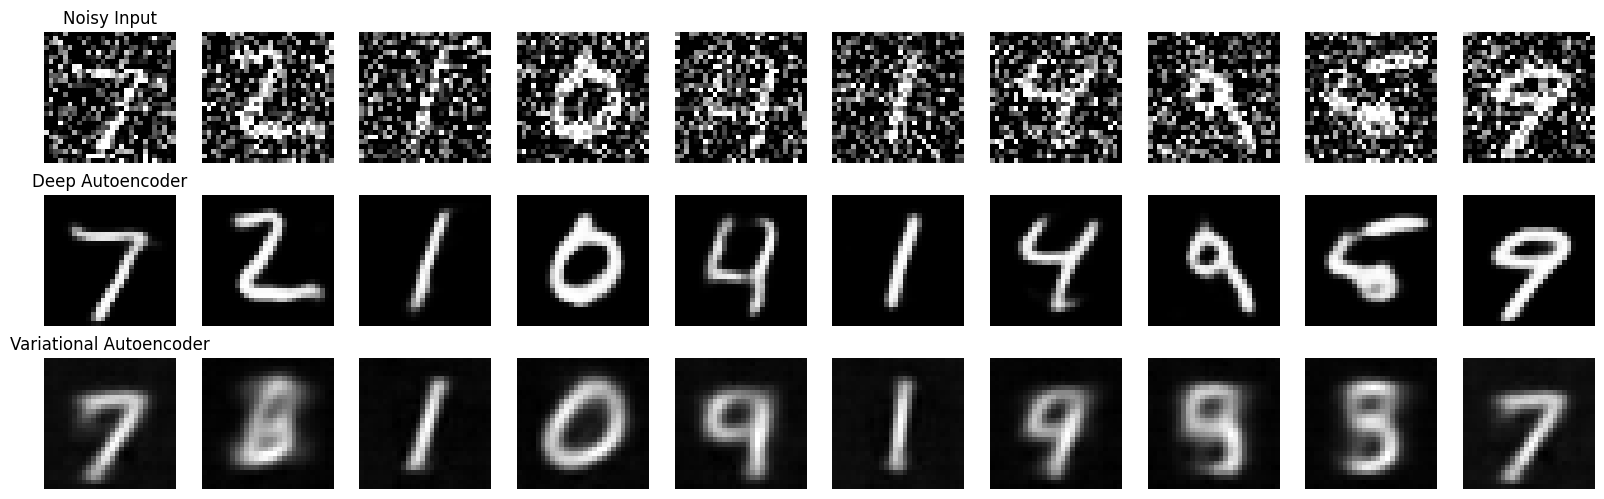

In [7]:
'''Training with 10 epocs'''
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#  Prepare Data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Add Noise
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Build Deep Denoising Autoencoder
def build_dae():
    input_img = layers.Input(shape=(28, 28, 1))

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(input_img, decoded, name="DAE")
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Build Variational Autoencoder
# Custom Layer to handle VAE Loss
class VAELossLayer(layers.Layer):
    def call(self, inputs):
        x_true, x_pred, z_mean, z_log_var = inputs
        # Reconstruction Loss
        rec_loss = tf.reduce_sum(tf.keras.losses.binary_crossentropy(x_true, x_pred), axis=(1, 2))
        rec_loss = tf.reduce_mean(rec_loss)
        # KL Divergence Loss
        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        # Add to model
        self.add_loss(rec_loss + kl_loss)
        return x_pred

def build_vae():
    latent_dim = 2

    # Encoder
    encoder_inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)

    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Sampling
    def sampling(args):
        z_m, z_lv = args
        batch = tf.shape(z_m)[0]
        dim = tf.shape(z_m)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_m + tf.exp(0.5 * z_lv) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

    decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")

    # VAE Assembly
    z_mean_enc, z_log_var_enc, z_enc = encoder(encoder_inputs)
    reconstructed = decoder(z_enc)

    # Calculate loss in the custom layer
    outputs = VAELossLayer()([encoder_inputs, reconstructed, z_mean_enc, z_log_var_enc])

    vae = models.Model(encoder_inputs, outputs, name="VAE")
    vae.compile(optimizer='adam')

    return vae

# Train Both Models
dae = build_dae()
vae = build_vae()

print("Training Deep autoencoder ")
dae.fit(x_train_noisy, x_train, epochs=10, batch_size=128, verbose=1)

print("\nTraining Variational autoencoder")
# VAE uses internal loss, but we pass x_train as y for Keras compatibility
vae.fit(x_train_noisy, x_train, epochs=10, batch_size=128, verbose=1)

# Compare & Visualize
dae_decoded = dae.predict(x_test_noisy)
vae_decoded = vae.predict(x_test_noisy)

# Calculate MSE
dae_mse = np.mean((x_test - dae_decoded) ** 2)
vae_mse = np.mean((x_test - vae_decoded) ** 2)

print(f"\nFinal Results:")
print(f"MSE of Deep Autoencoder: {dae_mse:.5f}")
print(f"MSE of Variational Autoencoder: {vae_mse:.5f}")

# Plot
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Noisy Input")

    # DAE
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(dae_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Deep Autoencoder")

    # VAE
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(vae_decoded[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Variational Autoencoder")
plt.show()